In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Brief Info

In this work, we will train a CNN classifier using Keras with the guidelines described in [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

Our strategy will be using 20% of the train data (12000 data rows) as a validation set to optimize the classifier, while keeping test data to finally evaluate the accuracy of the model on the data it has never seen.

#### Note
Since I was not sure if the data was already shuffled, I didn't pass `validation_split=0.2` to _fit()_ and instead explicitly shuffled and split the validation data, as `validation_split` [would](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed) use last 20% of the data in that case.

In [3]:
#
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

Using TensorFlow backend.


In [4]:
print(data_train.shape)
data_train

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [5]:
print(data_test.shape)
data_test

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [6]:
(data_train.label).dtype

dtype('int64')

In [7]:
#
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))
# yをバイナリクラスに。

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
X_train.shape

(48000, 784)

In [10]:
#
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [11]:
X_train.shape

(48000, 28, 28, 1)

In [12]:
#
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [13]:
#
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [14]:
batch_size = 256
num_classes = 10
epochs = 50

In [15]:
#
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', 
                 input_shape=input_shape))
# kernel_initializer='uniofrm'だと？
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [17]:
#from keras.utils.visualize_util import plot
#plot(model, show_shapes=True, show_layer_names=True)
#なぞ

ModuleNotFoundError: No module named 'keras.utils.visualize_util'

### Training
Let's `fit()`! Note that `fit()` will return a _History_ object which we can use to plot training vs. validation accuracy and loss.

In [ ]:
※めちゃ時間かかる　30分くらい。これはtime.time()しとくべき

In [18]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.8084 - acc: 0.7015 - val_loss: 0.4869 - val_acc: 0.8248
Epoch 2/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.5035 - acc: 0.8148 - val_loss: 0.4203 - val_acc: 0.8492
Epoch 3/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.4334 - acc: 0.8429 - val_loss: 0.3590 - val_acc: 0.8663
Epoch 4/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3908 - acc: 0.8575 - val_loss: 0.3281 - val_acc: 0.8778
Epoch 5/50
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3603 - acc: 0.8692 - val_loss: 0.3117 - val_acc: 0.8823
Epoch 6/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3384 - acc: 0.8768 - val_loss: 0.2946 - val_acc: 0.8910
Epoch 7/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3236 - acc: 0.8814 - val_loss: 0.2817 - val_acc

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20459014297127723
Test accuracy: 0.9287


### Results
It turns out our classifier does better then the best baseline reported [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/), which is an SVM classifier with mean accuracy of 0.897.



Let's plot training and validation accuracy as well as loss.

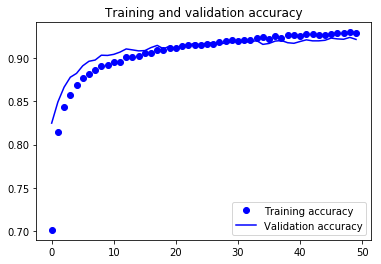

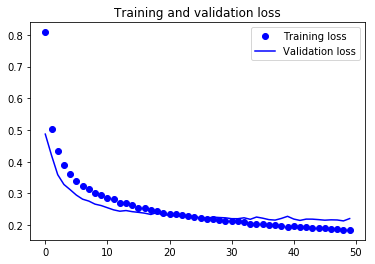

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification Report
We can summarize the performance of our classifier as follows

In [62]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]

In [63]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.87      0.89      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.88      0.91      0.89      1000
    Class 3       0.92      0.96      0.94      1000
    Class 4       0.92      0.86      0.89      1000
    Class 5       0.99      0.99      0.99      1000
    Class 6       0.80      0.78      0.79      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Here is a subset of correctly predicted classes.

In [68]:
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]
correct[:9]

array([ 0,  1,  2,  4,  6,  8,  9, 10, 12])

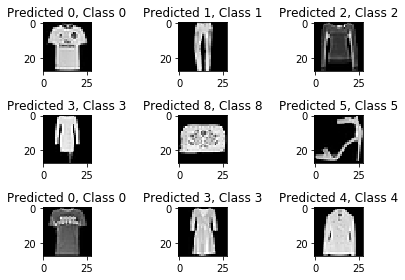

In [69]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

And here is a subset of incorrectly predicted classes.

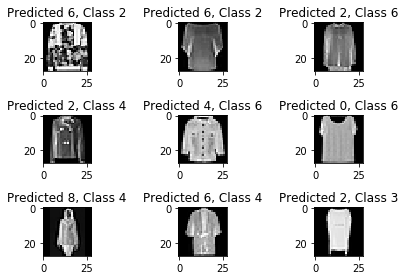

In [70]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.

#### What do the activations look like?

The snippets are taken from _Chollet, F (2017)_. The idea is the give an input data and visualize the activations of the conv layers.

In [75]:
X_train[154].shape

(28, 28, 1)

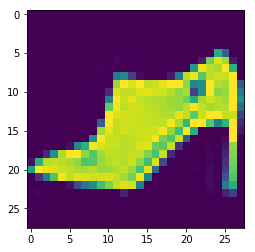

In [78]:
# テスト
plt.imshow(X_train[54].reshape(28,28))

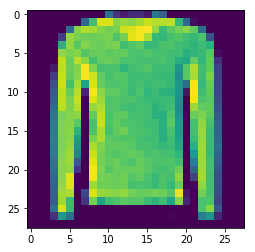

In [97]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

Let's see the activation of the 2nd channel of the first layer:

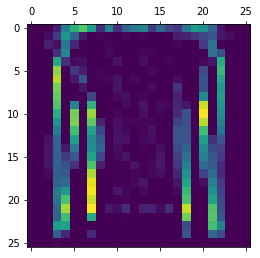

In [98]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Let's plot the activations of the other conv layers as well.

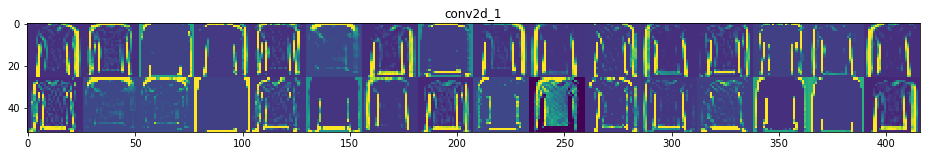

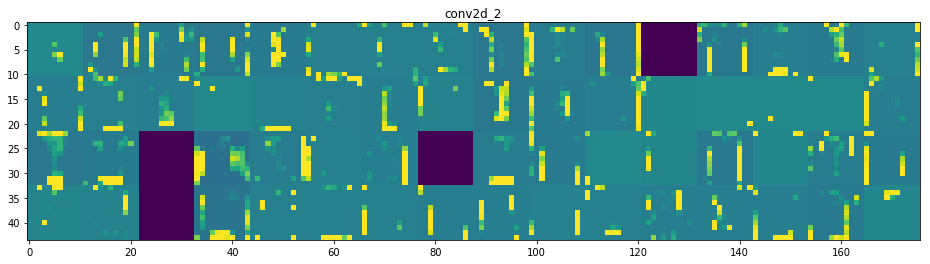

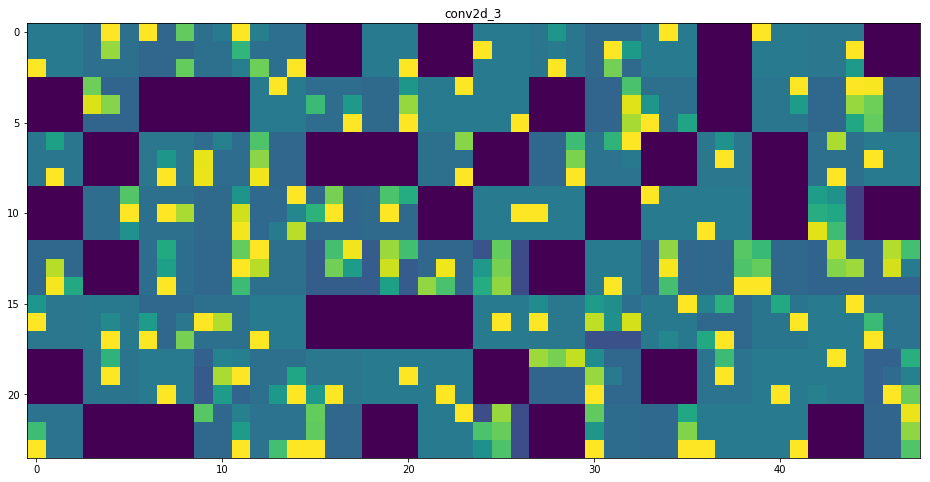

In [99]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')